<a href="https://colab.research.google.com/github/DLesmes/ML_NN_Sk/blob/main/NN_from_Sk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requeriments

In [169]:
import numpy as np
import modin.pandas as pd
#import pandas as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
from scipy.special import boxcox, inv_boxcox
from scipy import stats
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.preprocessing import MinMaxScaler, power_transform
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Load Data (Alomarrano)

In [154]:
df = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_full_ok.csv")
id_cli = df['id_registro']
#df = df.drop(['id_registro'], axis=1)
df

,periodo,fecha_nacimiento,edad,ult_actual,categoria,codigo_ciiu,ind_mora_vigente,cartera_castigada,mora_max,cant_moras_30_ult_12_meses,...,estado_civil,nivel_academico,profesion,ocupacion,ciudad_residencia,rep_calif_cred,genero,id_registro,anho,mes
0,201908,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201908,2019,8
1,201909,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201909,2019,9
2,201907,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201907,2019,7
3,201903,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201903,2019,3
4,201911,19840630,35,20180526,1.0,10,1,1,0,0,...,DIVORCIADO,TECNOLOGO,TECNOLOGIA SISTEMAS,Empleado,LORICA,C,M,2089776#201911,2019,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,202011,19740415,47,20201010,2.0,10,1,1,0,0,...,SOLTERO,UNIVERSITARIO,OTROS,Empleado,PUERRES,A,F,8596193#202011,2020,11
9527189,202011,19850620,35,20201003,3.0,90,1,1,28,0,...,DIVORCIADO,UNIVERSITARIO,CARRERA MILITAR,Empleado,PEDRAZA,C,M,8616083#202011,2020,11
9527190,202011,19740316,47,20200616,3.0,10,1,1,23,0,...,DIVORCIADO,UNIVERSITARIO,QUIMICA FARMACEUTICA,Independiente,MURILLO,D,M,8670207#202011,2020,11
9527191,202011,19780722,42,20200423,2.0,10,1,1,0,0,...,CASADO,ESPECIALIZACION,ECONOMIA,Empleado,PUERRES,B,F,8677655#202011,2020,11


In [155]:
mejores_variables = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_Variables.csv")
mejores_variables = list(mejores_variables['Selected_variables'])
mejores_variables

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'profesion',
 'nivel_academico',
 'ocupacion',
 'ocupacion_tag_gasto_familiar',
 'estado_civil',
 'rep_calif_cred',
 'genero',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'ciudad_residencia',
 'edad',
 'gasto_familiar']

In [156]:
df = df[mejores_variables]
df

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
0,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201908,0,0.0,8,903000.0,0.0,LORICA,35,2.325260e+05
1,1.0,1173431.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201909,0,0.0,9,903000.0,0.0,LORICA,35,2.659000e+05
2,1.0,1172612.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201907,0,0.0,7,903000.0,0.0,LORICA,35,2.430520e+05
3,1.0,1172612.0,1282673.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,1,201903,0,0.0,3,2433000.0,0.0,LORICA,35,2.760140e+05
4,1.0,1355032.0,1255032.0,TECNOLOGIA SISTEMAS,TECNOLOGO,Empleado,6,DIVORCIADO,C,M,...,0,201911,0,0.0,11,0.0,0.0,LORICA,35,4.188660e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.0,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.0,PUERRES,47,7.431714e+05
9527189,3.0,26913722.0,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.0,PEDRAZA,35,8.502165e+05
9527190,3.0,16301000.0,0.0,QUIMICA FARMACEUTICA,UNIVERSITARIO,Independiente,8,DIVORCIADO,D,M,...,17,202011,1,150800000.0,11,300000.0,0.0,MURILLO,47,7.853290e+05
9527191,2.0,14481371.0,11916465.0,ECONOMIA,ESPECIALIZACION,Empleado,6,CASADO,B,F,...,18,202011,1,26000000.0,11,184811000.0,0.0,PUERRES,42,1.029045e+06


In [157]:
features = pd.DataFrame(df.dtypes)
features.columns = ['type']
features_f = features[features['type'] == 'float64'].index
features_o = features[features['type'] == 'object'].index
#features_i = features[features['type'] == 'int64'].index
#features_b = features[features['type'] == 'bool'].index

In [158]:
df_std = df.iloc[6500000:,:]
df_std

,categoria,ingreso_final,mediana_nom3,profesion,nivel_academico,ocupacion,ocupacion_tag_gasto_familiar,estado_civil,rep_calif_cred,genero,...,cant_oblig_tot_sf,periodo,tenencia_tc,cupo_total_tc,mes,saldo_no_rot_mdo,mediana_pen3,ciudad_residencia,edad,gasto_familiar
6500000,2.0,11330521.31,0.0,OTROS,ESPECIALIZACION,Jubilado,2,CASADO,A,M,...,3,202001,1,40000000.0,1,82000.0,3831791.31,PEDRAZA,75,5.155400e+05
6500001,2.0,12562229.29,0.0,OTROS,ESPECIALIZACION,Jubilado,2,CASADO,B,M,...,3,201904,1,40000000.0,4,0.0,3831791.31,PEDRAZA,74,3.327700e+05
6500002,2.0,11555331.31,0.0,OTROS,ESPECIALIZACION,Jubilado,2,CASADO,A,M,...,3,201909,1,40000000.0,9,223000.0,3831791.31,PEDRAZA,74,5.994400e+05
6500003,2.0,9371320.00,3622610.0,ADMINISTRACION,UNIVERSITARIO,Empleado,6,UNION LIBRE,B,M,...,12,202004,1,19500000.0,4,5948000.0,0.00,PEDRAZA,42,4.600000e+03
6500004,2.0,6519869.00,2941320.0,ADMINISTRACION,UNIVERSITARIO,Empleado,6,UNION LIBRE,C,M,...,10,201911,0,0.0,11,27617000.0,0.00,PEDRAZA,41,4.534370e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.00,2281362.0,OTROS,UNIVERSITARIO,Empleado,6,SOLTERO,A,F,...,2,202011,1,6000000.0,11,0.0,0.00,PUERRES,47,7.431714e+05
9527189,3.0,26913722.00,14956096.0,CARRERA MILITAR,UNIVERSITARIO,Empleado,6,DIVORCIADO,C,M,...,12,202011,1,71000000.0,11,99000.0,0.00,PEDRAZA,35,8.502165e+05
9527190,3.0,16301000.00,0.0,QUIMICA FARMACEUTICA,UNIVERSITARIO,Independiente,8,DIVORCIADO,D,M,...,17,202011,1,150800000.0,11,300000.0,0.00,MURILLO,47,7.853290e+05
9527191,2.0,14481371.00,11916465.0,ECONOMIA,ESPECIALIZACION,Empleado,6,CASADO,B,F,...,18,202011,1,26000000.0,11,184811000.0,0.00,PUERRES,42,1.029045e+06


## One-Hot Encoding

In [159]:
df_onehot = pd.get_dummies(df_std,
                           columns=features_o)
list(df_onehot.columns)

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf',
 'periodo',
 'tenencia_tc',
 'cupo_total_tc',
 'mes',
 'saldo_no_rot_mdo',
 'mediana_pen3',
 'edad',
 'gasto_familiar',
 'profesion_ADMINISTRACION',
 'profesion_AGRONOMIA',
 'profesion_ARQUITECTURA',
 'profesion_ARTES',
 'profesion_AUXILIAR CONTABLE',
 'profesion_AUXILIAR DE ENFERMERIA',
 'profesion_AUXILIAR DE ODONTOLOGIA',
 'profesion_AZAFATA',
 'profesion_BACTERIOLOGIA',
 'profesion_BIOLOGIA',
 'profesion_CARRERA MILITAR',
 'profesion_COMERCIO INTERNACIONAL',
 'profesion_COMUNICACION SOCIAL',
 'profesion_CONSTRUCCION CIVIL',
 'profesion_CONTADURIA',
 'profesion_DECORADORES Y DISEÑADORES COMERCIALES',
 'pro

In [160]:
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,nivel_academico_tag_gasto_familiar,...,ciudad_residencia_YAMUESQUER,ciudad_residencia_YARIMA,ciudad_residencia_YONDO,ciudad_residencia_ZAMBRANO,ciudad_residencia_ZAPATOCA,ciudad_residencia_ZARAGOZA,ciudad_residencia_ZARZAL,ciudad_residencia_ZIPACON,ciudad_residencia_ZONA BANANERA,ciudad_residencia_ZU#IGA
6500000,2.0,11330521.31,0.0,2,1,1,8,2,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
6500001,2.0,12562229.29,0.0,2,1,1,7,2,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
6500002,2.0,11555331.31,0.0,2,1,1,8,2,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0
6500003,2.0,9371320.00,3622610.0,6,1,1,7,2,4.0,3.0,...,0,0,0,0,0,0,0,0,0,0
6500004,2.0,6519869.00,2941320.0,6,1,1,5,2,4.0,3.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.00,2281362.0,6,1,1,8,1,1.0,3.0,...,0,0,0,0,0,0,0,0,0,0
9527189,3.0,26913722.00,14956096.0,6,1,1,5,2,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
9527190,3.0,16301000.00,0.0,8,1,1,3,2,3.0,3.0,...,0,0,0,0,0,0,0,0,0,0
9527191,2.0,14481371.00,11916465.0,6,1,1,7,1,5.0,5.0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
(df_onehot.iloc[:,23] == df_onehot['gasto_familiar']).value_counts()

True    3027193
dtype: int64

## Best Variables

In [162]:
X = pd.read_csv("/mnt/workstation/data/Alomarrano/littlepig_PCAVariables_centred.csv")
top_PCA_Variables = list(X['Variable'])
top_PCA_Variables[:16]

['categoria',
 'ingreso_final',
 'mediana_nom3',
 'ocupacion_tag_gasto_familiar',
 'cartera_castigada',
 'ind_mora_vigente',
 'rep_calif_cred_tag_gasto_familiar',
 'genero_tag',
 'estado_civil_tag_gasto_familiar',
 'nivel_academico_tag_gasto_familiar',
 'profesion_tag_gasto_familiar',
 'ctas_activas',
 'ult_actual',
 'tiene_cred_hipo_2',
 'tiene_cred_hipo_1',
 'cant_oblig_tot_sf']

In [163]:
top_PCA_Variables = ['categoria',
                     'ingreso_final',
                     'mediana_nom3',
                     'ocupacion_tag_gasto_familiar',
                     'cartera_castigada',
                     'ind_mora_vigente',
                     'rep_calif_cred_tag_gasto_familiar',
                     'genero_tag',
                     'estado_civil_tag_gasto_familiar',
                     'nivel_academico_tag_gasto_familiar',
                     'profesion_tag_gasto_familiar',
                     'ctas_activas',
                     'ult_actual',
                     'tiene_cred_hipo_2',
                     'tiene_cred_hipo_1',
                     'cant_oblig_tot_sf',
                     'gasto_familiar']

In [164]:
df_onehot = df_onehot[top_PCA_Variables]
df_onehot

,categoria,ingreso_final,mediana_nom3,ocupacion_tag_gasto_familiar,cartera_castigada,ind_mora_vigente,rep_calif_cred_tag_gasto_familiar,genero_tag,estado_civil_tag_gasto_familiar,nivel_academico_tag_gasto_familiar,profesion_tag_gasto_familiar,ctas_activas,ult_actual,tiene_cred_hipo_2,tiene_cred_hipo_1,cant_oblig_tot_sf,gasto_familiar
6500000,2.0,11330521.31,0.0,2,1,1,8,2,5.0,5.0,44,1,20190612,0,0,3,5.155400e+05
6500001,2.0,12562229.29,0.0,2,1,1,7,2,5.0,5.0,44,1,20190112,0,0,3,3.327700e+05
6500002,2.0,11555331.31,0.0,2,1,1,8,2,5.0,5.0,44,1,20190612,0,0,3,5.994400e+05
6500003,2.0,9371320.00,3622610.0,6,1,1,7,2,4.0,3.0,55,1,20200119,0,0,12,4.600000e+03
6500004,2.0,6519869.00,2941320.0,6,1,1,5,2,4.0,3.0,55,1,20190308,0,0,10,4.534370e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527188,2.0,3876343.00,2281362.0,6,1,1,8,1,1.0,3.0,44,1,20201010,1,1,2,7.431714e+05
9527189,3.0,26913722.00,14956096.0,6,1,1,5,2,3.0,3.0,47,2,20201003,1,1,12,8.502165e+05
9527190,3.0,16301000.00,0.0,8,1,1,3,2,3.0,3.0,46,1,20200616,1,1,17,7.853290e+05
9527191,2.0,14481371.00,11916465.0,6,1,1,7,1,5.0,5.0,64,1,20200423,1,1,18,1.029045e+06


conditions = [
    (df_onehot['gasto_familiar'] < 0),
    (df_onehot['gasto_familiar'] >= 0)
]
values = [-1,1]
df_onehot['Negative'] = np.select(conditions, values)
df_onehot['Negative'].value_counts()

df_onehot['gasto_familiar'] = power_transform(np.array(df_onehot['gasto_familiar']).reshape(1, -1),method='yeo-johnson')
df_onehot['gasto_familiar'].describe()

In [166]:
minimo = np.min(df_onehot['gasto_familiar'])-1
df_onehot['gasto_familiar'] = stats.boxcox(df['gasto_familiar']-minimo)[0]
df_onehot['gasto_familiar'].describe()

count    3.027193e+06
mean     7.687062e+00
std      1.713230e-02
min      7.673822e+00
25%      7.677395e+00
50%      7.681972e+00
75%      7.690292e+00
max      8.203819e+00
Name: gasto_familiar, dtype: float64

Text(0, 0.5, 'count')

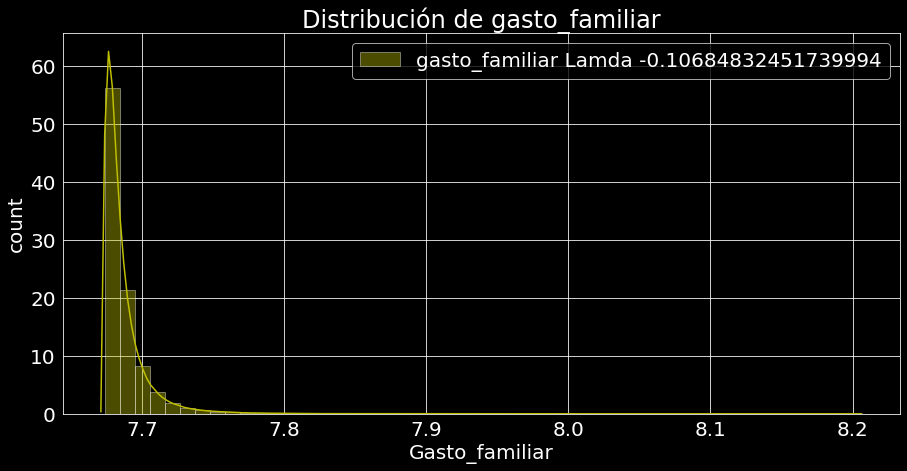

In [170]:
plt.rcParams.update({'font.size': 20})
plt.style.use("dark_background")
plt.figure(figsize=(15,7*1))
plt.title("Distribución de gasto_familiar") 
sns.distplot(df_onehot['gasto_familiar'],
             color='y', label='gasto_familiar Lamda '+str(stats.boxcox(df['gasto_familiar']-minimo)[1]))
plt.legend(loc='best')
plt.xlabel('Gasto_familiar')

#plt.tight_layout()
plt.ylabel("count")

## Normalization

In [171]:
Estandar = MinMaxScaler()
Estandar.fit(df_onehot)

df_std = Estandar.transform(df_onehot)
df_std = pd.DataFrame(df_std)
round(df_std.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
0,3027193.0,0.30,0.14,0.0,0.20,0.20,0.40,1.0
1,3027193.0,0.00,0.00,0.0,0.00,0.00,0.00,1.0
2,3027193.0,0.00,0.01,0.0,0.00,0.00,0.00,1.0
3,3027193.0,0.54,0.17,0.0,0.56,0.56,0.56,1.0
4,3027193.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
5,3027193.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0
6,3027193.0,0.61,0.36,0.0,0.29,0.57,1.00,1.0
7,3027193.0,0.48,0.50,0.0,0.00,0.00,1.00,1.0
8,3027193.0,0.46,0.46,0.0,0.00,0.50,1.00,1.0
9,3027193.0,0.38,0.24,0.0,0.40,0.40,0.40,1.0


In [172]:
x_val = df_std.iloc[-281666:,:-1]
y_val = df_std.iloc[-281666:,-1]
y = df_std.iloc[:-281666,-1]

In [173]:
print(x_val.shape)
print(y_val.shape)
print(y.shape)

(281666, 16)
(281666,)
(2745527,)


## Train_Test

In [174]:
X_train, X_test, y_train, y_test = train_test_split(df_std.iloc[:-281666,:-1],
                                                    y,
                                                    test_size=0.30)

X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
2697600,0.2,0.000698,0.011641,0.555556,0.0,0.0,1.000000,0.0,1.0,0.4,0.974359,0.028571,0.999471,0.0,0.0,0.028571
2386696,0.4,0.000385,0.000000,0.777778,0.0,0.0,0.142857,0.0,1.0,0.4,0.435897,0.028571,0.998976,0.0,0.0,0.000000
2715182,0.4,0.001087,0.021515,0.555556,0.0,0.0,0.571429,1.0,0.0,0.4,0.551282,0.028571,0.999960,0.0,0.0,0.104762
2086907,0.4,0.003309,0.000000,0.777778,0.0,0.0,0.857143,1.0,0.0,0.0,0.076923,0.028571,0.999960,0.0,0.0,0.000000
1997710,0.2,0.000369,0.000000,0.555556,0.0,0.0,0.857143,0.0,0.0,0.4,0.256410,0.028571,0.999005,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2625267,0.2,0.000497,0.000000,0.555556,0.0,0.0,0.857143,0.0,0.0,0.4,0.692308,0.028571,0.999514,0.0,0.0,0.000000
375686,0.2,0.000534,0.000000,0.555556,0.0,0.0,0.571429,0.0,0.0,0.4,0.653846,0.028571,0.998990,0.0,0.0,0.000000
231813,0.4,0.000195,0.007100,0.555556,0.0,0.0,1.000000,0.0,0.0,0.4,0.858974,0.028571,0.999470,0.0,0.0,0.057143
2217885,0.4,0.000255,0.000000,0.111111,0.0,0.0,0.142857,0.0,0.0,0.4,0.487179,0.028571,0.999955,0.0,0.0,0.076190


In [175]:
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)
x_val = np.asarray(x_val)
y_val = np.asarray(y_val)

# Arquitectura

In [176]:
#Definición de la arquitectura
model = Sequential()
model.add(Dense(32, input_dim=16, kernel_initializer='normal',activation='linear'))
model.add(Dense(64, kernel_initializer='normal',activation='linear'))
model.add(Dense(30, kernel_initializer='normal',activation='linear'))
model.add(Dense(15, kernel_initializer='normal',activation='linear'))
model.add(Dense(7, kernel_initializer='normal',activation='linear'))
model.add(Dense(1, kernel_initializer='normal'))

# Compilación del modelo
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_absolute_percentage_error'])

In [177]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_8 (Dense)              (None, 30)                1950      
_________________________________________________________________
dense_9 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_10 (Dense)             (None, 7)                 112       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 8         
Total params: 5,191
Trainable params: 5,191
Non-trainable params: 0
____________________________________________________

In [178]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


# Entrenamiento y Evaluación del modelo</h1>


# Test 0

In [179]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=1,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


In [180]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

25740/25740 [==============================] - 19s 733us/step - loss: 0.0010 - mean_absolute_percentage_error: 1506114.0000
loss :  0.0010312082013115287
mean_absolute_percentage_error :  1506114.0


## Submission

In [181]:
y_hat = model.predict(x_val)
y_hat

array([[0.02600525],
       [0.02600524],
       [0.02600525],
       ...,
       [0.02600525],
       [0.02600523],
       [0.02600523]], dtype=float32)

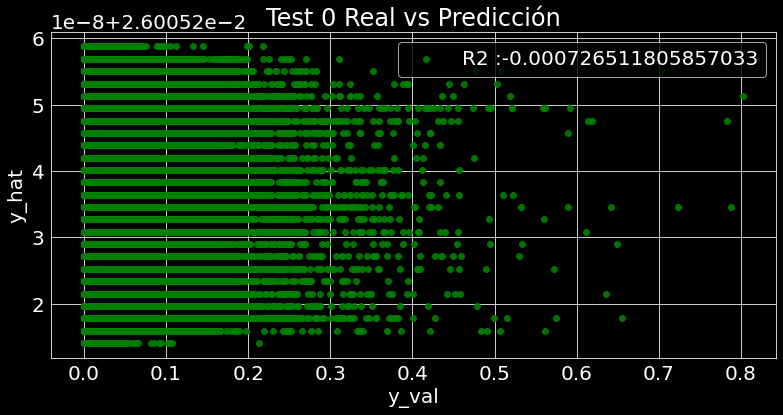

In [182]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'green',
           alpha=0.9)
plt.title('Test 0 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [183]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.474359,0.057143,0.998999,1.0,1.0,0.066667,0.026005
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,0.692308,0.028571,0.998966,1.0,1.0,0.047619,0.026005
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.551282,0.057143,0.999460,1.0,1.0,0.028571,0.026005
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,0.576923,0.028571,0.998970,1.0,1.0,0.000000,0.026005
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,0.974359,0.028571,0.999000,1.0,1.0,0.066667,0.026005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,0.551282,0.028571,1.000000,1.0,1.0,0.019048,0.026005
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,0.589744,0.057143,0.999999,1.0,1.0,0.114286,0.026005
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,0.576923,0.028571,0.999980,1.0,1.0,0.161905,0.026005
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,0.807692,0.028571,0.999970,1.0,1.0,0.171429,0.026005


In [184]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         7.687605
1         7.687605
2         7.687605
3         7.687605
4         7.687605
            ...   
281661    7.687605
281662    7.687605
281663    7.687605
281664    7.687605
281665    7.687605
Name: 16, Length: 281666, dtype: float64

In [185]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,7.687605
1,12598#201902,7.687605
2,23697#201902,7.687605
3,23768#201902,7.687605
4,7174#201902,7.687605
...,...,...
281661,8596193#202011,7.687605
281662,8616083#202011,7.687605
281663,8670207#202011,7.687605
281664,8677655#202011,7.687605


In [186]:
sub['gasto_familiar'] = inv_boxcox(sub['gasto_familiar'],
                                                 stats.boxcox(df['gasto_familiar']-minimo)[1])+minimo
sub['gasto_familiar'].describe()

count    281666.000000
mean     742962.016743
std           0.324991
min      742961.370712
25%      742961.759311
50%      742961.981367
75%      742962.314451
max      742962.703050
Name: gasto_familiar, dtype: float64

In [187]:
n = 46
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN46.csv'

In [188]:
np.mean(sub['gasto_familiar'])

742962.0167434277

In [189]:
sub.to_csv(sub_name, index=False)

# Test 1

In [190]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=5,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)

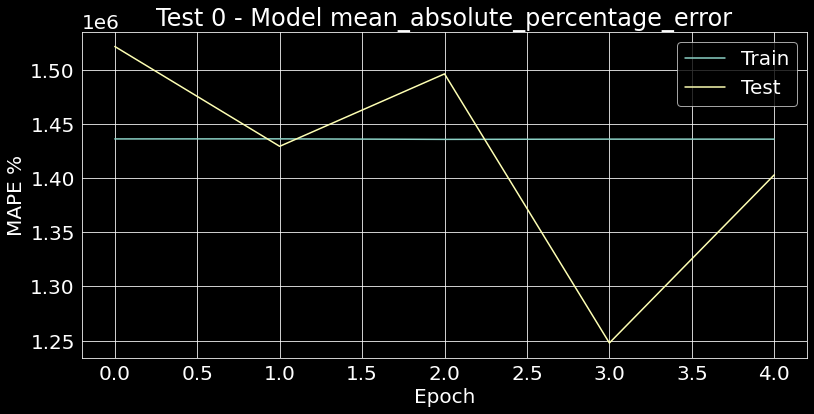

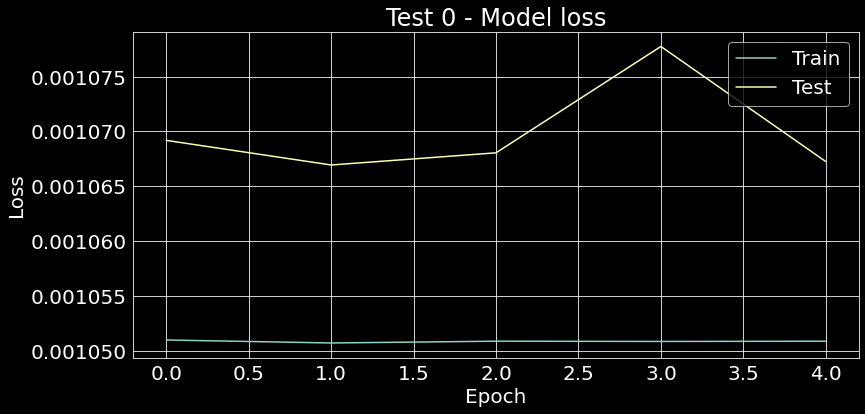

In [191]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 0 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 0 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [192]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

25740/25740 [==============================] - 19s 732us/step - loss: 0.0010 - mean_absolute_percentage_error: 1421903.6250
loss :  0.001030161278322339
mean_absolute_percentage_error :  1421903.625


# Submission

In [193]:
y_hat = model.predict(x_val)
y_hat

array([[0.02455228],
       [0.02455227],
       [0.02455228],
       ...,
       [0.02455227],
       [0.02455228],
       [0.02455228]], dtype=float32)

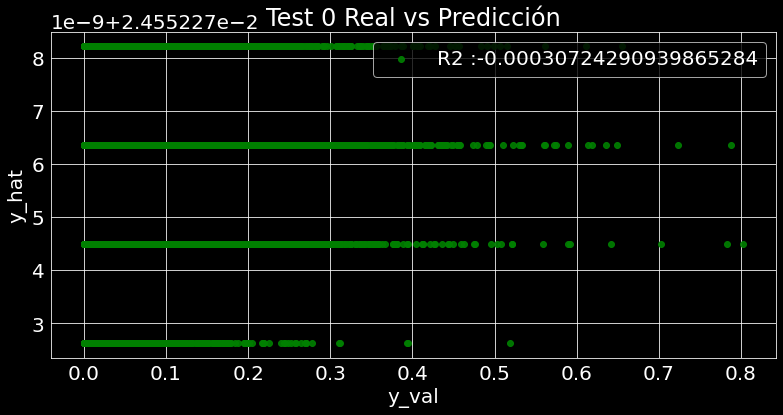

In [194]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'green',
           alpha=0.9)
plt.title('Test 0 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [195]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.474359,0.057143,0.998999,1.0,1.0,0.066667,0.024552
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,0.692308,0.028571,0.998966,1.0,1.0,0.047619,0.024552
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.551282,0.057143,0.999460,1.0,1.0,0.028571,0.024552
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,0.576923,0.028571,0.998970,1.0,1.0,0.000000,0.024552
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,0.974359,0.028571,0.999000,1.0,1.0,0.066667,0.024552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,0.551282,0.028571,1.000000,1.0,1.0,0.019048,0.024552
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,0.589744,0.057143,0.999999,1.0,1.0,0.114286,0.024552
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,0.576923,0.028571,0.999980,1.0,1.0,0.161905,0.024552
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,0.807692,0.028571,0.999970,1.0,1.0,0.171429,0.024552


In [196]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         7.686835
1         7.686835
2         7.686835
3         7.686835
4         7.686835
            ...   
281661    7.686835
281662    7.686835
281663    7.686835
281664    7.686835
281665    7.686835
Name: 16, Length: 281666, dtype: float64

In [197]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,7.686835
1,12598#201902,7.686835
2,23697#201902,7.686835
3,23768#201902,7.686835
4,7174#201902,7.686835
...,...,...
281661,8596193#202011,7.686835
281662,8616083#202011,7.686835
281663,8670207#202011,7.686835
281664,8677655#202011,7.686835


In [198]:
sub['gasto_familiar'] = inv_boxcox(sub['gasto_familiar'],
                                                 stats.boxcox(df['gasto_familiar']-minimo)[1])+minimo
sub['gasto_familiar'].describe()

count    281666.000000
mean     699761.333809
std           0.037670
min      699761.232515
25%      699761.287765
50%      699761.343015
75%      699761.343015
max      699761.398265
Name: gasto_familiar, dtype: float64

In [199]:
n = 41
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN41.csv'

In [200]:
np.mean(sub['gasto_familiar'])

699761.3338086668

In [201]:
sub.to_csv(sub_name, index=False)

# Test 2

In [202]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


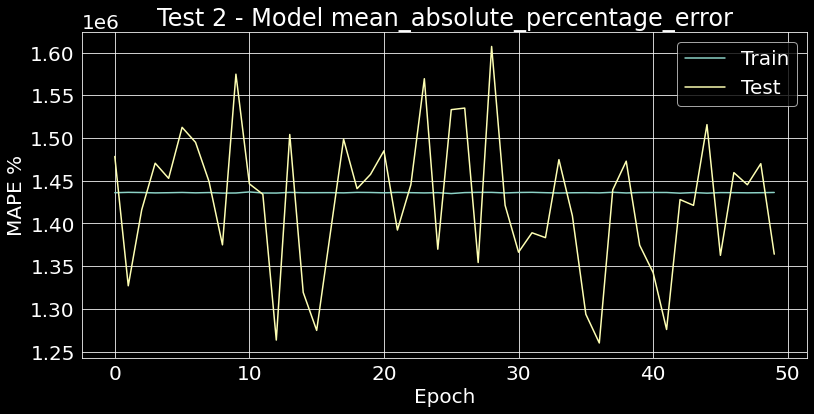

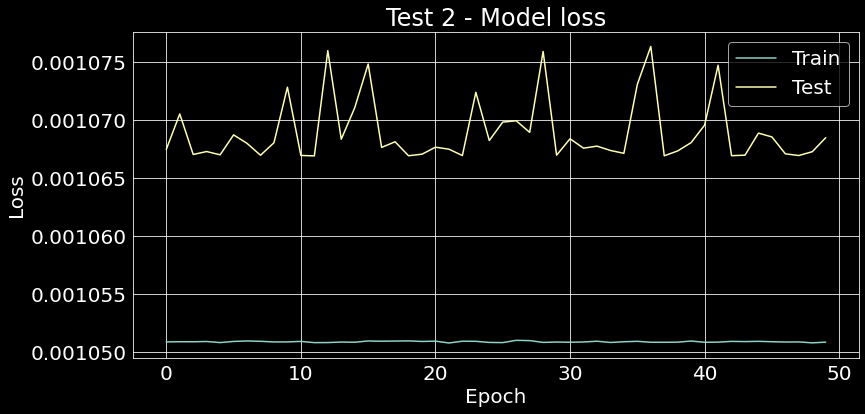

In [203]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 2 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 2 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [204]:
results = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results[i])

25740/25740 [==============================] - 18s 714us/step - loss: 0.0010 - mean_absolute_percentage_error: 1382485.2500
loss :  0.0010311276419088244
mean_absolute_percentage_error :  1382485.25


# Submission

In [205]:
y_hat = model.predict(x_val)
y_hat

array([[0.02387097],
       [0.02387097],
       [0.02387097],
       ...,
       [0.02387097],
       [0.02387097],
       [0.02387097]], dtype=float32)

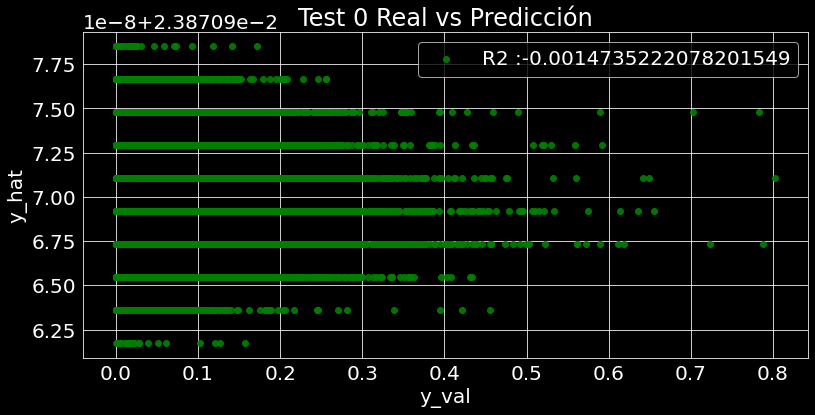

In [206]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'green',
           alpha=0.9)
plt.title('Test 0 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [207]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.474359,0.057143,0.998999,1.0,1.0,0.066667,0.023871
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,0.692308,0.028571,0.998966,1.0,1.0,0.047619,0.023871
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.551282,0.057143,0.999460,1.0,1.0,0.028571,0.023871
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,0.576923,0.028571,0.998970,1.0,1.0,0.000000,0.023871
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,0.974359,0.028571,0.999000,1.0,1.0,0.066667,0.023871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,0.551282,0.028571,1.000000,1.0,1.0,0.019048,0.023871
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,0.589744,0.057143,0.999999,1.0,1.0,0.114286,0.023871
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,0.576923,0.028571,0.999980,1.0,1.0,0.161905,0.023871
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,0.807692,0.028571,0.999970,1.0,1.0,0.171429,0.023871


In [208]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         7.686473
1         7.686473
2         7.686473
3         7.686473
4         7.686473
            ...   
281661    7.686473
281662    7.686473
281663    7.686473
281664    7.686473
281665    7.686473
Name: 16, Length: 281666, dtype: float64

In [209]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,7.686473
1,12598#201902,7.686473
2,23697#201902,7.686473
3,23768#201902,7.686473
4,7174#201902,7.686473
...,...,...
281661,8596193#202011,7.686473
281662,8616083#202011,7.686473
281663,8670207#202011,7.686473
281664,8677655#202011,7.686473


In [210]:
sub['gasto_familiar'] = inv_boxcox(sub['gasto_familiar'],
                                                 stats.boxcox(df['gasto_familiar']-minimo)[1])+minimo
sub['gasto_familiar'].describe()

count    281666.000000
mean     679574.992013
std           0.075605
min      679574.765586
25%      679574.930965
50%      679574.986091
75%      679575.041217
max      679575.261723
Name: gasto_familiar, dtype: float64

In [211]:
n = 42
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN42.csv'

In [212]:
np.mean(sub['gasto_familiar'])

679574.9920129849

In [213]:
sub.to_csv(sub_name, index=False)

# Test 3

In [214]:
import matplotlib.pyplot as plt

history = model.fit(X_train,
                    y_train,
                    batch_size=32,
                    epochs=75,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


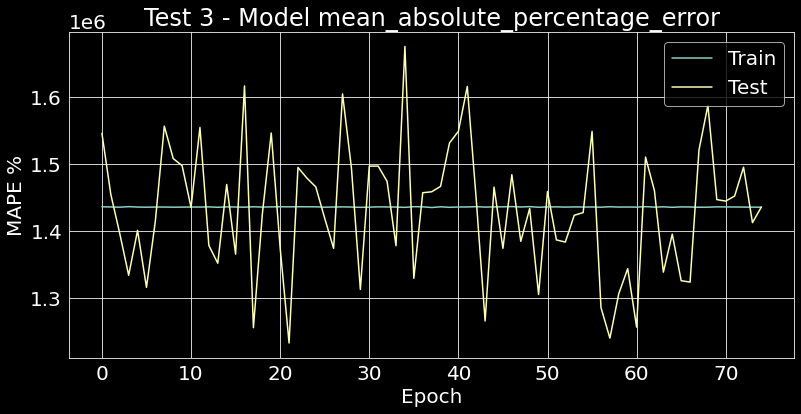

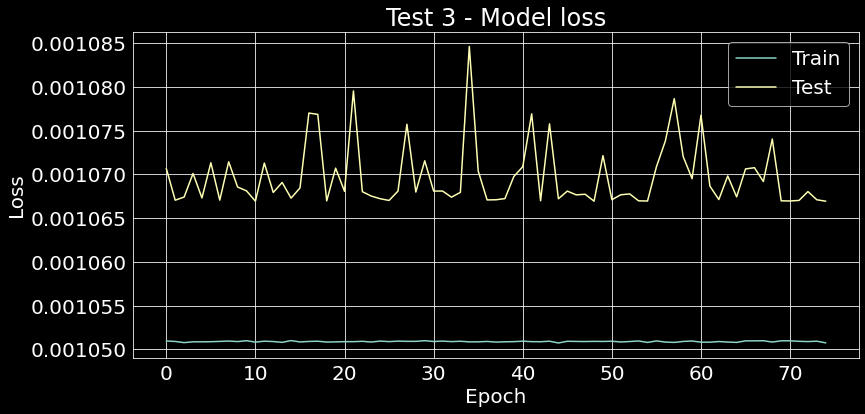

In [215]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 3 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 3 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [216]:
results_h = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_h[i])

25740/25740 [==============================] - 18s 714us/step - loss: 0.0010 - mean_absolute_percentage_error: 1455671.6250
loss :  0.0010300754802301526
mean_absolute_percentage_error :  1455671.625


## Submission

In [217]:
y_hat = model.predict(x_val)
y_hat

array([[0.02513289],
       [0.02513293],
       [0.02513289],
       ...,
       [0.02513293],
       [0.02513273],
       [0.02513273]], dtype=float32)

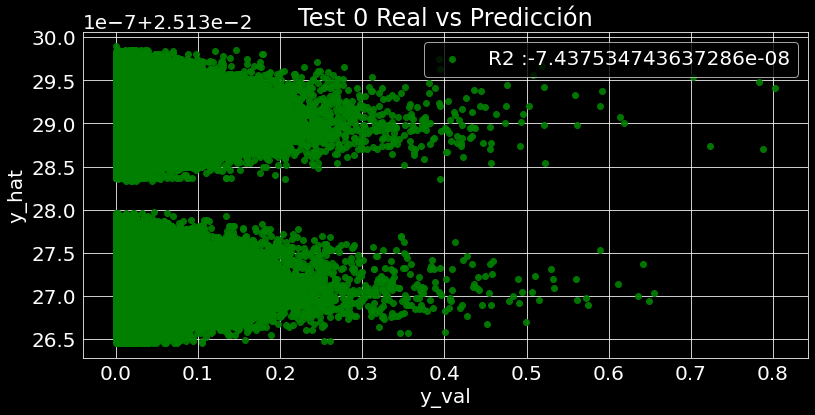

In [218]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'green',
           alpha=0.9)
plt.title('Test 0 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [219]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.474359,0.057143,0.998999,1.0,1.0,0.066667,0.025133
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,0.692308,0.028571,0.998966,1.0,1.0,0.047619,0.025133
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.551282,0.057143,0.999460,1.0,1.0,0.028571,0.025133
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,0.576923,0.028571,0.998970,1.0,1.0,0.000000,0.025133
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,0.974359,0.028571,0.999000,1.0,1.0,0.066667,0.025133
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,0.551282,0.028571,1.000000,1.0,1.0,0.019048,0.025133
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,0.589744,0.057143,0.999999,1.0,1.0,0.114286,0.025133
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,0.576923,0.028571,0.999980,1.0,1.0,0.161905,0.025133
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,0.807692,0.028571,0.999970,1.0,1.0,0.171429,0.025133


In [220]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         7.687142
1         7.687142
2         7.687142
3         7.687142
4         7.687142
            ...   
281661    7.687142
281662    7.687142
281663    7.687142
281664    7.687142
281665    7.687142
Name: 16, Length: 281666, dtype: float64

In [221]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,7.687142
1,12598#201902,7.687142
2,23697#201902,7.687142
3,23768#201902,7.687142
4,7174#201902,7.687142
...,...,...
281661,8596193#202011,7.687142
281662,8616083#202011,7.687142
281663,8670207#202011,7.687142
281664,8677655#202011,7.687142


In [222]:
sub['gasto_familiar'] = inv_boxcox(sub['gasto_familiar'],
                                                 stats.boxcox(df['gasto_familiar']-minimo)[1])+minimo
sub['gasto_familiar'].describe()

count    281666.000000
mean     716997.601035
std           2.952380
min      716992.654624
25%      716994.592055
50%      716999.241893
75%      717000.293643
max      717002.895339
Name: gasto_familiar, dtype: float64

In [223]:
n = 43
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN43.csv'

In [224]:
np.mean(sub['gasto_familiar'])

716997.6010347775

In [225]:
sub.to_csv(sub_name, index=False)

# Test 4

In [226]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=100,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)


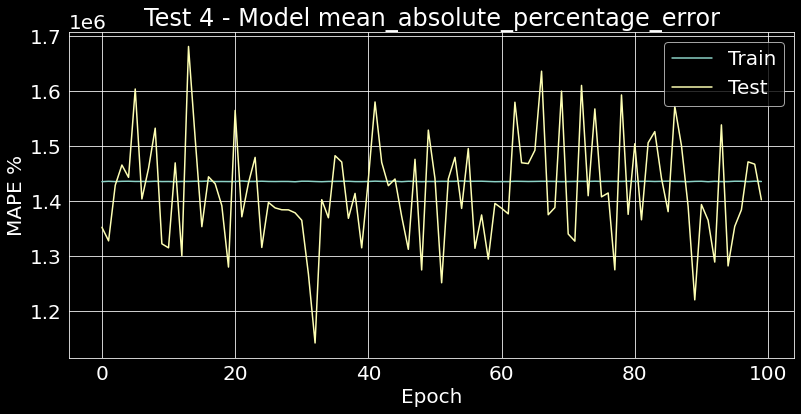

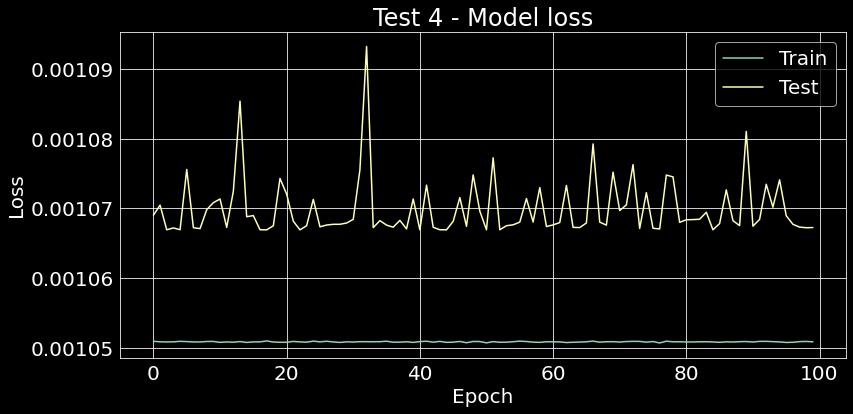

In [227]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 4 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 4 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [228]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

25740/25740 [==============================] - 18s 714us/step - loss: 0.0010 - mean_absolute_percentage_error: 1421683.3750
loss :  0.0010301652364432812
mean_absolute_percentage_error :  1421683.375


## Submission

In [229]:
y_hat = model.predict(x_val)
y_hat

array([[0.02454783],
       [0.02454782],
       [0.02454783],
       ...,
       [0.02454783],
       [0.02454783],
       [0.02454783]], dtype=float32)

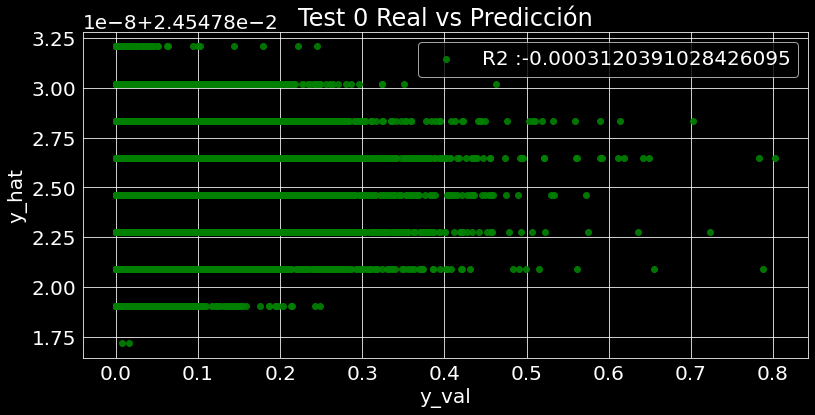

In [230]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'green',
           alpha=0.9)
plt.title('Test 0 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [231]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.474359,0.057143,0.998999,1.0,1.0,0.066667,0.024548
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,0.692308,0.028571,0.998966,1.0,1.0,0.047619,0.024548
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.551282,0.057143,0.999460,1.0,1.0,0.028571,0.024548
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,0.576923,0.028571,0.998970,1.0,1.0,0.000000,0.024548
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,0.974359,0.028571,0.999000,1.0,1.0,0.066667,0.024548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,0.551282,0.028571,1.000000,1.0,1.0,0.019048,0.024548
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,0.589744,0.057143,0.999999,1.0,1.0,0.114286,0.024548
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,0.576923,0.028571,0.999980,1.0,1.0,0.161905,0.024548
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,0.807692,0.028571,0.999970,1.0,1.0,0.171429,0.024548


In [232]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         7.686832
1         7.686832
2         7.686832
3         7.686832
4         7.686832
            ...   
281661    7.686832
281662    7.686832
281663    7.686832
281664    7.686832
281665    7.686832
Name: 16, Length: 281666, dtype: float64

In [233]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,7.686832
1,12598#201902,7.686832
2,23697#201902,7.686832
3,23768#201902,7.686832
4,7174#201902,7.686832
...,...,...
281661,8596193#202011,7.686832
281662,8616083#202011,7.686832
281663,8670207#202011,7.686832
281664,8677655#202011,7.686832


In [234]:
sub['gasto_familiar'] = inv_boxcox(sub['gasto_familiar'],
                                                 stats.boxcox(df['gasto_familiar']-minimo)[1])+minimo
sub['gasto_familiar'].describe()

count    281666.000000
mean     699629.308617
std           0.072180
min      699629.075958
25%      699629.241705
50%      699629.296954
75%      699629.352203
max      699629.517950
Name: gasto_familiar, dtype: float64

In [235]:
n = 44
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN44.csv'

In [236]:
np.mean(sub['gasto_familiar'])

699629.3086172095

In [237]:
sub.to_csv(sub_name, index=False)

# Test 5

In [238]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=150,
                    validation_data=(x_val,y_val),
                    verbose=0,
                   use_multiprocessing=True)



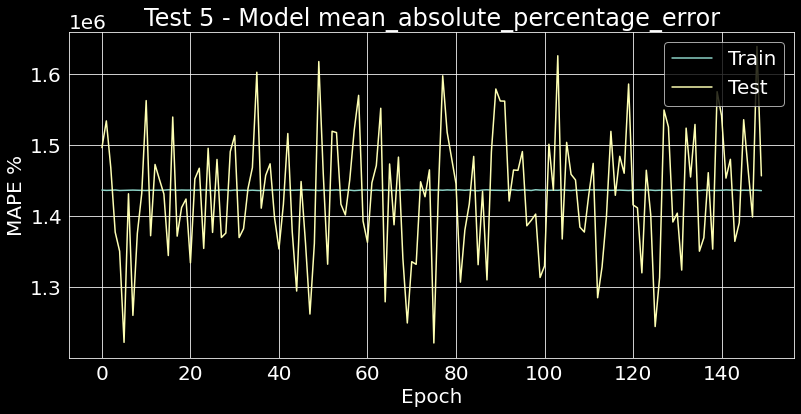

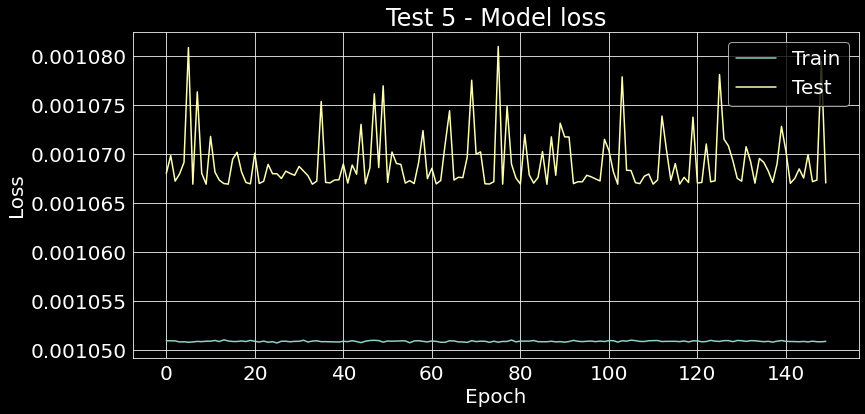

In [239]:
# Plot training & validation accuracy values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.style.use("dark_background")
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('Test 5 - Model mean_absolute_percentage_error')
plt.ylabel('MAPE %')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot training & validation loss values
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Test 5 - Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [240]:
results_3 = model.evaluate(X_test, y_test)

for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],": ", results_3[i])

25740/25740 [==============================] - 18s 714us/step - loss: 0.0010 - mean_absolute_percentage_error: 1475973.5000
loss :  0.0010303478920832276
mean_absolute_percentage_error :  1475973.5


# Submission

In [241]:
y_hat = model.predict(x_val)
y_hat

array([[0.02548432],
       [0.02548432],
       [0.02548432],
       ...,
       [0.02548431],
       [0.02548432],
       [0.02548432]], dtype=float32)

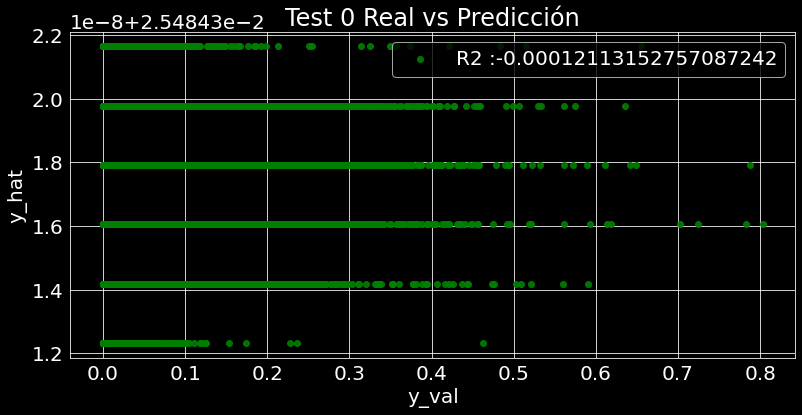

In [242]:
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(13,6))
sns.set_style('darkgrid')
plt.style.use("dark_background")
plt.scatter(y= pd.DataFrame(y_hat),
                x=pd.DataFrame(y_val),
           color = 'green',
           alpha=0.9)
plt.title('Test 0 Real vs Predicción')
plt.xlabel('y_val')
plt.ylabel('y_hat')
plt.legend(['R2 :{}'.format(str(r2_score(pd.DataFrame(y_val),
                                pd.DataFrame(y_hat))))],
           loc='upper right',
           )
plt.show()

In [243]:
sub_normalized = pd.DataFrame(x_val)
sub_normalized[16] = y_hat
sub_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.4,0.000723,0.016087,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.474359,0.057143,0.998999,1.0,1.0,0.066667,0.025484
1,0.2,0.000347,0.005197,0.555556,0.0,0.0,0.000000,1.0,0.00,0.4,0.692308,0.028571,0.998966,1.0,1.0,0.047619,0.025484
2,0.4,0.000802,0.013274,0.555556,0.0,0.0,1.000000,1.0,1.00,0.4,0.551282,0.057143,0.999460,1.0,1.0,0.028571,0.025484
3,0.2,0.000556,0.000000,0.555556,0.0,0.0,0.142857,1.0,0.50,0.6,0.576923,0.028571,0.998970,1.0,1.0,0.000000,0.025484
4,0.6,0.001357,0.000000,0.555556,0.0,0.0,1.000000,0.0,0.50,0.4,0.974359,0.028571,0.999000,1.0,1.0,0.066667,0.025484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281661,0.4,0.000580,0.005085,0.555556,0.0,0.0,1.000000,0.0,0.00,0.4,0.551282,0.028571,1.000000,1.0,1.0,0.019048,0.025484
281662,0.6,0.004030,0.033339,0.555556,0.0,0.0,0.571429,1.0,0.50,0.4,0.589744,0.057143,0.999999,1.0,1.0,0.114286,0.025484
281663,0.6,0.002441,0.000000,0.777778,0.0,0.0,0.285714,1.0,0.50,0.4,0.576923,0.028571,0.999980,1.0,1.0,0.161905,0.025484
281664,0.4,0.002168,0.026563,0.555556,0.0,0.0,0.857143,0.0,1.00,0.8,0.807692,0.028571,0.999970,1.0,1.0,0.171429,0.025484


In [244]:
sub_desnorm = Estandar.inverse_transform(sub_normalized)
sub_desnorm = pd.DataFrame(sub_desnorm).iloc[:,-1]
sub_desnorm

0         7.687329
1         7.687329
2         7.687329
3         7.687329
4         7.687329
            ...   
281661    7.687329
281662    7.687329
281663    7.687329
281664    7.687329
281665    7.687329
Name: 16, Length: 281666, dtype: float64

In [245]:
sub_record = pd.DataFrame(id_cli.iloc[-281666:,])
sub_record.reset_index(inplace = True, drop =True)
sub_record.reset_index(inplace = True)
sub_gasto = pd.DataFrame(sub_desnorm)
sub_gasto.reset_index(inplace = True, drop =True)
sub_gasto.reset_index(inplace = True)
sub = pd.merge(sub_record,sub_gasto, on = 'index',how="left")
sub = sub.drop(columns=['index'], axis=0)
sub.columns = ['id_registro','gasto_familiar']
sub

,id_registro,gasto_familiar
0,4055#201902,7.687329
1,12598#201902,7.687329
2,23697#201902,7.687329
3,23768#201902,7.687329
4,7174#201902,7.687329
...,...,...
281661,8596193#202011,7.687329
281662,8616083#202011,7.687329
281663,8670207#202011,7.687329
281664,8677655#202011,7.687329


In [246]:
sub['gasto_familiar'] = inv_boxcox(sub['gasto_familiar'],
                                                 stats.boxcox(df['gasto_familiar']-minimo)[1])+minimo
sub['gasto_familiar'].describe()

count    281666.000000
mean     727449.900904
std           0.053548
min      727449.751287
25%      727449.862126
50%      727449.917545
75%      727449.917545
max      727450.028383
Name: gasto_familiar, dtype: float64

In [247]:
n = 45
sub_name = "/mnt/workstation/data/Alomarrano/Sub/SubNN{}.csv".format(n)
sub_name

'/mnt/workstation/data/Alomarrano/Sub/SubNN45.csv'

In [248]:
np.mean(sub['gasto_familiar'])

727449.900904183

In [249]:
sub.to_csv(sub_name, index=False)